### Date:March 2022


<h1> DSI Module 2 Twist challenge </h1>


<h1> Beijing Multisite Air Quality Machine Learning Model </h1> 

<h1> 1. Introduction </h1>

#### Context: Exploring Air Pollutants in Beijing
PM2.5 readings are often included in air quality reports from environmental authorities and companies. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution.

#### Content
This data set includes  air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. <br/>
The time period is from March 1st, 2013 to February 28th, 2017.

#### Acknowledgements
Zhang, S., Guo, B., Dong, A., He, J., Xu, Z. and Chen, S.X. (2017) Cautionary Tales on Air-Quality Improvement in Beijing. Proceedings of the Royal Society A, Volume 473, No. 2205, Pages 20170457.

The files were downloaded from the UCI Machine Learning Repository and have not been modified.<br/>
https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data


### Problem Statement:

The pollutant that affects people the most is particulate matter, usually abbreviated as PM and used as a measure of air pollution. Although particles with a diameter of 10 microns or less (≤PM10) can penetrate and embed deep in the lungs, the ones that are more harmful to health are those with a diameter of 2.5 microns or less (≤PM2.5).

The model uses linear regression to predict the concentration of PM2.5 using the values of other air quality indices and conditions.

<h1> 2. Import Libraries</h1>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Read system file path of data set to load the path
import os

# import 'Numpy' 
import numpy as np # linear algebra
# import 'Pandas' 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels 
import statsmodels.api as sm
import statsmodels.stats.api as stats
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import glob
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
from datetime import datetime, timedelta


# import various functions from scipy
import scipy as sci
from scipy import stats as scistats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#!pip install dash
import pandas as pd
import plotly.express as px  # (version 4.7.0 or higher)
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output  # pip install dash (version 2.0.0 or higher)

import sqlite3
import csv

<h1> 3. Data Scrapping</h1>

In [2]:
# importing necessary modules
import requests, zipfile
from io import BytesIO
print('Downloading started')

#Defining the zip file URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip'

# Split URL to get the file name
filename = url.split('/')[-1]

# Downloading the file by sending the request to the URL
req = requests.get(url)
print('Downloading Completed')

# extracting the zip file contents
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('Documents/Technology sub/Data Science/Python/')

#### DATA SET DETAILS:




=======================================================================<br/>
**1. No:** 		Row number                              <br/>
**2. year:** 	Year of data in this row                <br/>
**3. month:** 	Month of data in this row               <br/>
**4. day:** 	Day of data in this row                 <br/>
**5. hour:** 	Hour of data in this row                <br/>
**6. PM2.5:** 	PM2.5 concentration (ug/m^3)            <br/>
**7. PM10:** 	PM10 concentration (ug/m^3)             <br/>
**8. SO2:** 	SO2 concentration (ug/m^3)              <br/>
**9. NO2:** 	NO2 concentration (ug/m^3)              <br/>
**10. CO:** 	CO concentration (ug/m^3)           	<br/>
**11. O3:** 	O3 concentration (ug/m^3)           	<br/>
**12. TEMP:** 	Temperature (degree Celsius)            <br/>
**13. PRES:** 	Pressure (hPa)                          <br/>
**14. DEWP:** 	Dew point temperature (degree Celsius)  <br/>
**15. RAIN:** 	Precipitation (mm)                      <br/>
**16. wd:** 		Wind direction                      <br/>
**17. WSPM:** 	Wind speed (m/s)                        <br/>
**18. station:**	Name of the air-quality monitoring site <br/>

==========================================================================

<h1> 4. Load data</h1>

In [3]:
 #Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
df_AQI1 = pd.DataFrame()
df_AQI2 = pd.DataFrame()
count = 0
for dirname, _, filenames in os.walk('Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228'):

    for filename in filenames:
        path = os.path.join(dirname, filename) 

        print('File path : ',path)
        if count == 0:
            df_AQI2 = pd.read_csv(path, encoding="utf-8")
            df_AQI1 = df_AQI1.append(df_AQI2)
            count = 1
            continue
            
        df_AQI2 = pd.read_csv(path, encoding="utf-8")
        df_AQI1 = df_AQI1.append(df_AQI2)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Aotizhongxin_20130301-20170228.csv
File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Changping_20130301-20170228.csv
File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Dingling_20130301-20170228.csv
File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Dongsi_20130301-20170228.csv
File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Guanyuan_20130301-20170228.csv
File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Gucheng_20130301-20170228.csv
File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Huairou_20130301-20170228.csv
File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Nongzhanguan_2

<h1> 5. Exploratory Data Analysis</h1>

In [4]:
import calendar
d = dict(enumerate(calendar.month_abbr))
df_AQI=df_AQI1.copy()
df_AQI['month'] = df_AQI['month'].map(d)

<h2> 5.1. Check Data</h2>

In [5]:
df_AQI.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,Mar,1,0,4.000000,4.000000,4.000000,7.000000,300.000000,77.000000,-0.700000,1023.000000,-18.800000,0.000000,NNW,4.400000,Aotizhongxin
1,2,2013,Mar,1,1,8.000000,8.000000,4.000000,7.000000,300.000000,77.000000,-1.100000,1023.200000,-18.200000,0.000000,N,4.700000,Aotizhongxin
2,3,2013,Mar,1,2,7.000000,7.000000,5.000000,10.000000,300.000000,73.000000,-1.100000,1023.500000,-18.200000,0.000000,NNW,5.600000,Aotizhongxin
3,4,2013,Mar,1,3,6.000000,6.000000,11.000000,11.000000,300.000000,72.000000,-1.400000,1024.500000,-19.400000,0.000000,NW,3.100000,Aotizhongxin
4,5,2013,Mar,1,4,3.000000,3.000000,12.000000,12.000000,300.000000,72.000000,-2.000000,1025.200000,-19.500000,0.000000,N,2.000000,Aotizhongxin


In [6]:
df_AQI.describe()

,No,year,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [7]:
df_AQI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  object 
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(3)
memory usage: 61.0+ MB


<a id='quantitative'></a>
### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;"> Quantitative Variable:Numerical Data Details

In [8]:
df_Quantitative = df_AQI.select_dtypes(exclude='object')
df_Quantitative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   No      420768 non-null  int64  
 1   year    420768 non-null  int64  
 2   day     420768 non-null  int64  
 3   hour    420768 non-null  int64  
 4   PM2.5   412029 non-null  float64
 5   PM10    414319 non-null  float64
 6   SO2     411747 non-null  float64
 7   NO2     408652 non-null  float64
 8   CO      400067 non-null  float64
 9   O3      407491 non-null  float64
 10  TEMP    420370 non-null  float64
 11  PRES    420375 non-null  float64
 12  DEWP    420365 non-null  float64
 13  RAIN    420378 non-null  float64
 14  WSPM    420450 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 51.4 MB


<a id='qualitative'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">Qualitative Variable:Categorical Data Details

In [9]:
df_Qualitative = df_AQI.select_dtypes(exclude=np.number)
df_Qualitative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   month    420768 non-null  object
 1   wd       418946 non-null  object
 2   station  420768 non-null  object
dtypes: object(3)
memory usage: 12.8+ MB


<h2> 5.2 Data Cleaning</h2>

columns with missing values

In [10]:
df_AQI.isna().sum().sum()

74027

In [11]:
# percentage of missing values in each column
round(df_AQI.isnull().sum()/len(df_AQI.index), 2)*100

No        0.000000
year      0.000000
month     0.000000
day       0.000000
hour      0.000000
PM2.5     2.000000
PM10      2.000000
SO2       2.000000
NO2       3.000000
CO        5.000000
O3        3.000000
TEMP      0.000000
PRES      0.000000
DEWP      0.000000
RAIN      0.000000
wd        0.000000
WSPM      0.000000
station   0.000000
dtype: float64

### Inputing Missing Values


In [12]:
df_AQI['PM2.5'].fillna(df_AQI['PM2.5'].median(), inplace=True)
df_AQI['PM10'].fillna(df_AQI['PM10'].median(), inplace=True)
df_AQI['SO2'].fillna(df_AQI['SO2'].median(), inplace=True)
df_AQI['NO2'].fillna(df_AQI['NO2'].mean(), inplace=True)
df_AQI['CO'].fillna(df_AQI['CO'].median(), inplace=True)
df_AQI['O3'].fillna(df_AQI['O3'].median(), inplace=True)
df_AQI['TEMP'].fillna(df_AQI['TEMP'].median(), inplace=True)
df_AQI['PRES'].fillna(df_AQI['PRES'].median(), inplace=True)
df_AQI['DEWP'].fillna(df_AQI['DEWP'].mean(), inplace=True)
df_AQI['RAIN'].fillna(df_AQI['RAIN'].median(), inplace=True)
df_AQI['WSPM'].fillna(df_AQI['WSPM'].median(), inplace=True)

In [13]:
round(df_AQI.isnull().sum()/len(df_AQI.index), 2)*100

No        0.000000
year      0.000000
month     0.000000
day       0.000000
hour      0.000000
PM2.5     0.000000
PM10      0.000000
SO2       0.000000
NO2       0.000000
CO        0.000000
O3        0.000000
TEMP      0.000000
PRES      0.000000
DEWP      0.000000
RAIN      0.000000
wd        0.000000
WSPM      0.000000
station   0.000000
dtype: float64

In [14]:
df_AQI = df_AQI.drop(['wd', 'No'], axis=1)
df_AQI.isna().sum().sum()

0

### Summary Statistics

In [15]:
df_AQI.drop(['year','month','day','hour'],axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM2.5,420768.000000,79.278489,80.056799,2.000000,21.000000,55.000000,109.000000,999.000000
PM10,420768.000000,104.256193,91.108745,2.000000,36.000000,82.000000,144.000000,999.000000
SO2,420768.000000,15.641507,21.455419,0.285600,3.000000,7.000000,19.000000,500.000000
NO2,420768.000000,50.638586,34.618463,1.026500,24.000000,45.000000,70.000000,290.000000
CO,420768.000000,1214.493362,1133.542988,100.000000,500.000000,900.000000,1500.000000,10000.000000
O3,420768.000000,56.981874,55.802413,0.214200,12.000000,45.000000,80.000000,1071.000000
TEMP,420768.000000,13.539885,11.430768,-19.900000,3.100000,14.500000,23.200000,41.600000
PRES,420768.000000,1010.746658,10.469168,982.400000,1002.300000,1010.400000,1019.000000,1042.800000
DEWP,420768.000000,2.490822,13.787240,-43.400000,-8.900000,3.000000,15.100000,29.100000
RAIN,420768.000000,0.064416,0.820626,0.000000,0.000000,0.000000,0.000000,72.500000


### Check Standard Deviation is Zero, if any remove from the analysis

In [16]:
df_AQI.std()

year       1.177198
day        8.800102
hour       6.922195
PM2.5     80.056799
PM10      91.108745
SO2       21.455419
NO2       34.618463
CO      1133.542988
O3        55.802413
TEMP      11.430768
PRES      10.469168
DEWP      13.787240
RAIN       0.820626
WSPM       1.245947
dtype: float64

**Interpretation:** There are no zero standard devition of given data set

### Outlier Analysis and Treatment for all features

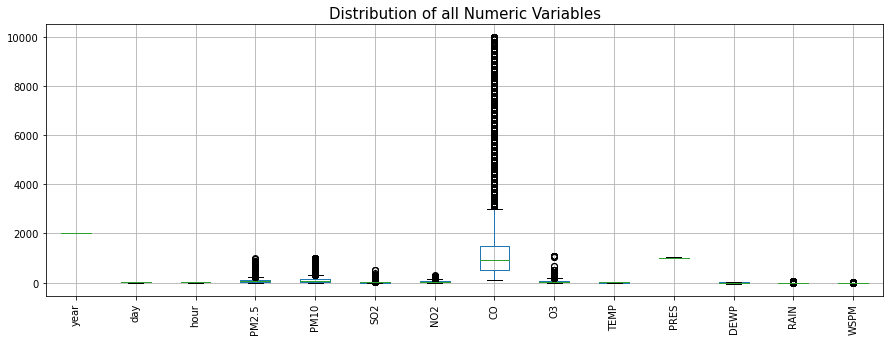

In [17]:
data = df_AQI.copy()
data = data.select_dtypes(exclude='object')
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,5))

# plot a boxplot to visualize the outliers in all the numeric variables
data.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 10)

# display the plot
plt.show()

**Interpretation:** From the above plots, we notice that all the variables have points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

### Correlation between features and ploting Heat map:

Multi-Collinearity Feature:: NO2 &  PM2.5 :-> Correlation Score 0.658
Multi-Collinearity Feature:: NO2 &  CO :-> Correlation Score 0.6869
Multi-Collinearity Feature:: CO &  PM2.5 :-> Correlation Score 0.7672
Multi-Collinearity Feature:: CO &  SO2 :-> Correlation Score 0.5235
Multi-Collinearity Feature:: CO &  NO2 :-> Correlation Score 0.6869
Multi-Collinearity Feature:: TEMP &  O3 :-> Correlation Score 0.5858
Multi-Collinearity Feature:: TEMP &  DEWP :-> Correlation Score 0.8201


<AxesSubplot:>

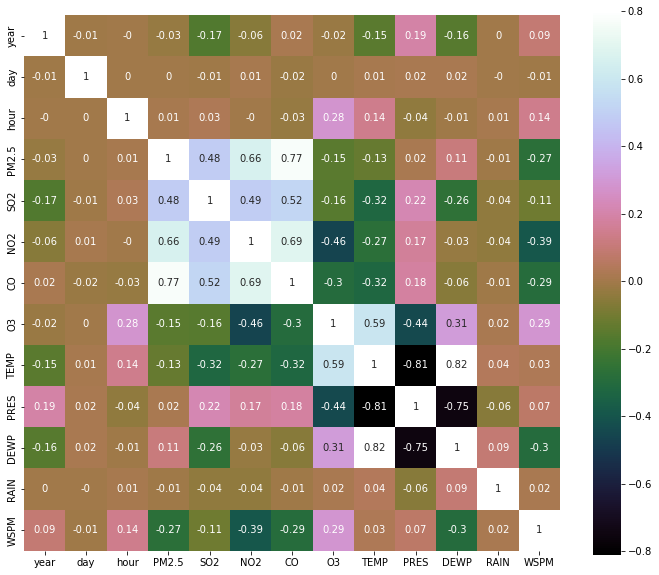

In [18]:
import seaborn as sns
data = df_AQI.select_dtypes(exclude='object').copy()
data = data.drop(['PM10'],axis=1)
corrmat = data.select_dtypes(exclude='object').corr()
f, ax = plt.subplots(figsize=(12, 10))

dupl_key_values = list()
for i in range(len(corrmat.columns)):
  for j in range(len(corrmat.index)):
    if corrmat.iloc[i,j]>0.50 and corrmat.iloc[i,j] != 1.0:
        if i not in dupl_key_values or j in dupl_key_values:
            dupl_key_values.append(j)
        if i in dupl_key_values or j not in dupl_key_values:
            dupl_key_values.append(i)
            print('Multi-Collinearity Feature:: {} &  {} :-> Correlation Score {}'.format(corrmat.columns[i],corrmat.columns[j],round(corrmat.iloc[i,j],4)))

sns.heatmap(round(corrmat, 2), vmax=.8, square=True, annot=True,cmap='cubehelix')

#### Interpretation: Relatively high correlation seen among CO, NO2, SO2 and PM2.5 and also between O3 and temp.

##### #Correlation Score#
1. NO2 &  PM2.5 :-> 0.658
2. Multi-Collinearity Feature:: NO2 &  CO :-> 0.6869
3. Multi-Collinearity Feature:: CO &  PM2.5 :-> 0.7672
4. Multi-Collinearity Feature:: CO &  SO2 :-> 0.5235
5. Multi-Collinearity Feature:: CO &  NO2 :-> 0.6869
6. Multi-Collinearity Feature:: TEMP &  O3 :-> 0.5858
7. Multi-Collinearity Feature:: TEMP &  DEWP :-> 0.8201


**Subsequent models might have high Multicolinearity behavior**

<h2> 5.3 EDA Plots </h2>

### Yearly Analysis of Different Pollutants

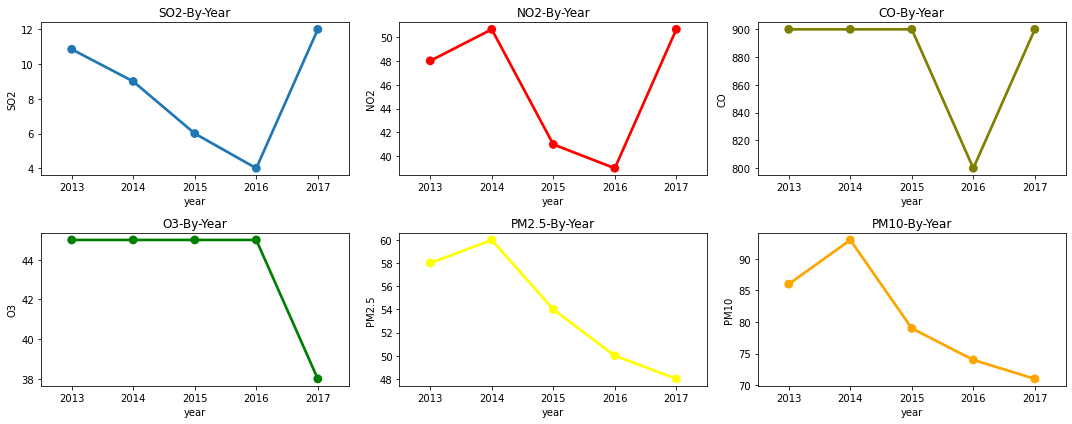

In [19]:
df = df_AQI[['SO2','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
fig,ax=plt.subplots(2, 3,figsize=(15,6))
ax[0, 0].set_title('SO2-By-Year')
sns.pointplot(ax= ax[0,0],x='year', y='SO2', data=df)

df = df_AQI[['NO2','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[0, 1].set_title('NO2-By-Year')
sns.pointplot(ax= ax[0,1], x='year', y='NO2', data=df,markers='o', color='red')

df = df_AQI[['CO','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[0, 2].set_title('CO-By-Year')
sns.pointplot(ax= ax[0,2],x='year', y='CO', data=df,markers='o', color='olive')

df = df_AQI[['O3','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 0].set_title('O3-By-Year')
sns.pointplot(ax=ax[1, 0], x='year', y='O3', data=df,markers='o', color='green')


df = df_AQI[['PM2.5','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 1].set_title('PM2.5-By-Year')
sns.pointplot(ax=ax[1, 1],x='year', y='PM2.5', data=df,markers='o', color='yellow')


df = df_AQI[['PM10','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 2].set_title('PM10-By-Year')
sns.pointplot(ax=ax[1,2], x='year', y='PM10', data=df,markers='o', color='orange')
fig.tight_layout()

**Interpretation:** <br/>

From the above plots:<br/>
By the end of 2017 fine particulate pollution (PM2. 5) fell by 35% and by 25% in the surrounding Beijing-Tianjin-Hebei region. Much of this reduction came from measures to control coal-fired boilers, provide cleaner domestic fuels, and industrial restructuring
https://www.ccacoalition.org/en/news/beijing%E2%80%99s-air-quality-improvements-are-model-other-cities#:~:text=By%20the%20end%20of%202017,domestic%20fuels%2C%20and%20industrial%20restructuring.

### Hourly Analysis of Pollutants in 2017

In [20]:
df_2017 = df_AQI[df_AQI['year']==2017]

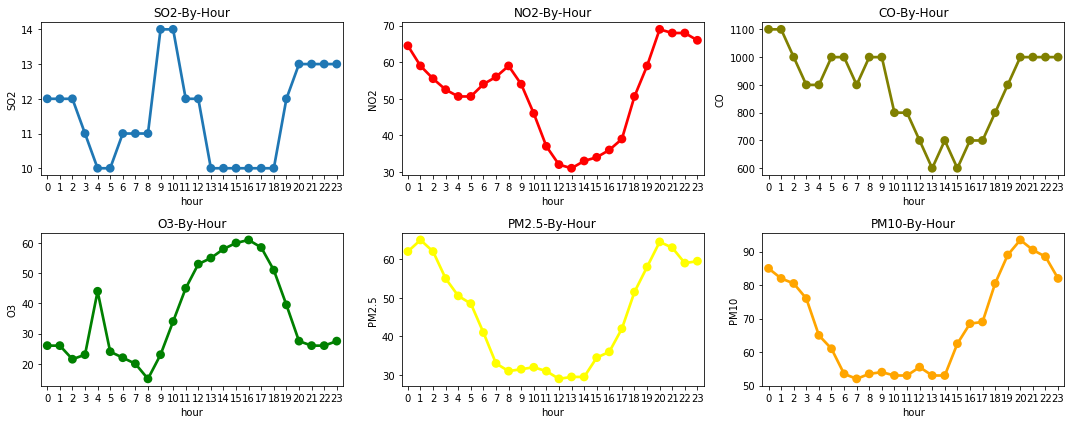

In [21]:
df = df_2017[['SO2','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
fig,ax=plt.subplots(2, 3, figsize=(15,6))
ax[0, 0].set_title('SO2-By-Hour')
sns.pointplot(ax=ax[0,0],x='hour', y='SO2', data=df)

df = df_2017[['NO2','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[0, 1].set_title('NO2-By-Hour')
sns.pointplot(ax= ax[0,1], x='hour', y='NO2', data=df,markers='o', color='red')

df = df_2017[['CO','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[0, 2].set_title('CO-By-Hour')
sns.pointplot(ax= ax[0,2],x='hour', y='CO', data=df,markers='o', color='olive')

df = df_2017[['O3','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[1, 0].set_title('O3-By-Hour')
sns.pointplot(ax=ax[1, 0], x='hour', y='O3', data=df,markers='o', color='green')

df = df_2017[['PM2.5','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[1, 1].set_title('PM2.5-By-Hour')
sns.pointplot(ax=ax[1, 1],x='hour', y='PM2.5', data=df,markers='o', color='yellow')

df = df_2017[['PM10','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[1, 2].set_title('PM10-By-Hour')
sns.pointplot(ax=ax[1,2], x='hour', y='PM10', data=df,markers='o', color='orange')

fig.tight_layout()

**Interpretation:** <br/>

From the above plots:<br/>
The day of busines end hours (9:00 AM to 7:00 PM) we can easily find the Polutant gases contributing more to PM2.5

### Analysis of Pollutants in day of the week

In [22]:
df_AQI1.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.000000,4.000000,4.000000,7.000000,300.000000,77.000000,-0.700000,1023.000000,-18.800000,0.000000,NNW,4.400000,Aotizhongxin
1,2,2013,3,1,1,8.000000,8.000000,4.000000,7.000000,300.000000,77.000000,-1.100000,1023.200000,-18.200000,0.000000,N,4.700000,Aotizhongxin
2,3,2013,3,1,2,7.000000,7.000000,5.000000,10.000000,300.000000,73.000000,-1.100000,1023.500000,-18.200000,0.000000,NNW,5.600000,Aotizhongxin
3,4,2013,3,1,3,6.000000,6.000000,11.000000,11.000000,300.000000,72.000000,-1.400000,1024.500000,-19.400000,0.000000,NW,3.100000,Aotizhongxin
4,5,2013,3,1,4,3.000000,3.000000,12.000000,12.000000,300.000000,72.000000,-2.000000,1025.200000,-19.500000,0.000000,N,2.000000,Aotizhongxin


In [23]:
# creating date field for further analysis by extracting day of the week, month etc.
df_2017 = df_AQI1[df_AQI1['year']==2017]
df_2017['date']=pd.to_datetime(df_2017[['year', 'month', 'day']])

In [24]:
# function to find day of the week based on the date field
import calendar
def findDay(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

In [25]:
df_2017['day_week'] = df_2017['date'].apply(lambda x: findDay(x))

In [26]:
custom_day = {'Monday':0, 'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

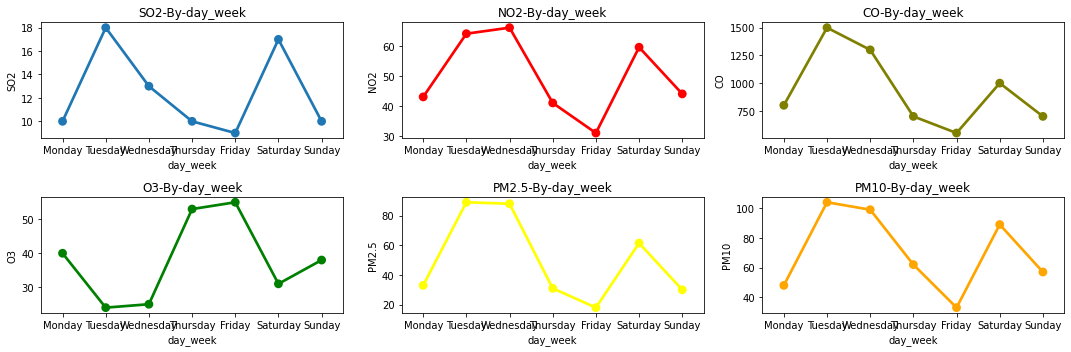

In [27]:
df = df_2017[['SO2','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
fig,ax=plt.subplots(2,3, figsize=(15,5))
ax[0, 0].set_title('SO2-By-day_week')
sns.pointplot(ax=ax[0,0],x='day_week', y='SO2',markers='o', data=df)

df = df_2017[['NO2','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[0, 1].set_title('NO2-By-day_week')
sns.pointplot(ax= ax[0,1], x='day_week', y='NO2', data=df,markers='o', color='red')

df = df_2017[['CO','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[0, 2].set_title('CO-By-day_week')
sns.pointplot(ax= ax[0,2],x='day_week', y='CO', data=df, color='olive')

df = df_2017[['O3','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[1, 0].set_title('O3-By-day_week')
sns.pointplot(ax=ax[1, 0], x='day_week', y='O3', data=df,markers='o', color='green')

df = df_2017[['PM2.5','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[1, 1].set_title('PM2.5-By-day_week')
sns.pointplot(ax=ax[1, 1],x='day_week', y='PM2.5', data=df,markers='o', color='yellow')

df = df_2017[['PM10','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[1, 2].set_title('PM10-By-day_week')
sns.pointplot(ax=ax[1,2], x='day_week', y='PM10', data=df, markers='o', color='orange')

fig.tight_layout()

**Interpretation:** <br/>

From the above plots:<br/>
During week days Co, NO2, SO2 Polutant gases contributing more to PM2.5

### Analysis of Pollutants month wise wrt to station

In [28]:
df_mon = df_AQI.copy()
#converting month values to month name for better understanding
df_mon.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace=True)

In [29]:
#Assign the year to numeric number
custom_dict = {'Jan':0, 'Feb':1,'Mar':2,'Apr':3,'May':4,'Jun':5,'Jul':6,'Aug':7,'Sep':8,'Oct':9,'Nov':10,'Dec':11}

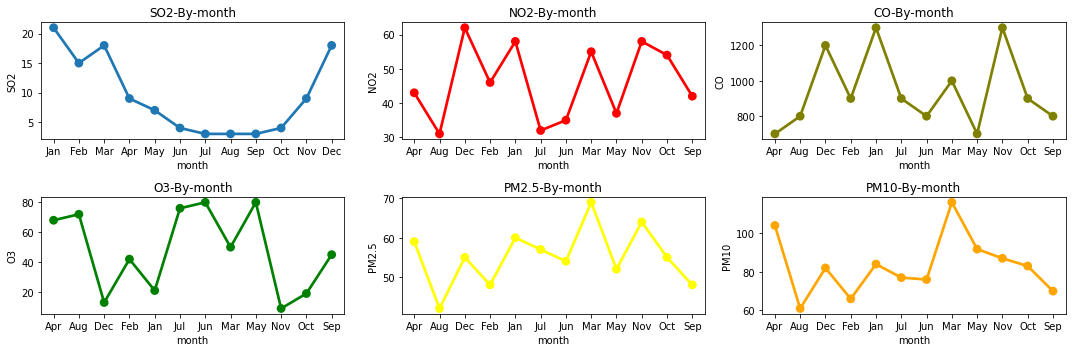

In [30]:
df = df_mon[['SO2','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
df = df.iloc[df['month'].map(custom_dict).argsort()]
fig,ax=plt.subplots(2,3, figsize=(15,5))
ax[0, 0].set_title('SO2-By-month')
sns.pointplot(ax= ax[0,0], x='month', y='SO2', data=df)

df = df_mon[['NO2','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[0, 1].set_title('NO2-By-month')
sns.pointplot(ax= ax[0,1], x='month', y='NO2', data=df,markers='o', color='red')

df = df_mon[['CO','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[0, 2].set_title('CO-By-month')
sns.pointplot(ax= ax[0,2],x='month', y='CO', data=df,markers='o', color='olive')

df = df_mon[['O3','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[1, 0].set_title('O3-By-month')
sns.pointplot(ax=ax[1, 0], x='month', y='O3', data=df,markers='o', color='green')

df = df_mon[['PM2.5','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[1, 1].set_title('PM2.5-By-month')
sns.pointplot(ax=ax[1, 1],x='month', y='PM2.5', data=df,markers='o', color='yellow')

df = df_mon[['PM10','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[1, 2].set_title('PM10-By-month')
sns.pointplot(ax=ax[1,2], x='month', y='PM10', data=df,markers='o', color='orange')

fig.tight_layout()

<h1> 6. Model Building Using Linear Regression </h1>

In [31]:
df_AQI = df_AQI.drop(['PM10'], axis=1)
df_AQI.head(1)

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
0,2013,Mar,1,0,4.000000,4.000000,7.000000,300.000000,77.000000,-0.700000,1023.000000,-18.800000,0.000000,4.400000,Aotizhongxin


In [32]:
#Keep original Dat frame after data cleaning and the imputing null value.
#copy the data frame for Model building analysis
df_md1 = df_AQI.copy()
df_md1.head(1)

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
0,2013,Mar,1,0,4.000000,4.000000,7.000000,300.000000,77.000000,-0.700000,1023.000000,-18.800000,0.000000,4.400000,Aotizhongxin


### Split the data into training and test sets.

In [33]:
#Add constant in to the data frame for the intercept -NA
# df = sm.add_constant(df)
# SPlit data n
df_md1 = df_AQI.copy()
X= df_md1.drop(['PM2.5','station','year'], axis=1)
X= sm.add_constant(X)
Y =df_md1['PM2.5']

X_train , X_test, y_train,y_test = train_test_split( X, Y, test_size = 0.2)

print(X_train.shape , X_test.shape, y_train.shape,y_test.shape)

(336614, 13) (84154, 13) (336614,) (84154,)


### Linear Regression

### Build OLS - Model for anlaysis

In [34]:
#Build model using linear
# Reomve Object type
X_train_ex_object = X_train.select_dtypes(exclude = 'object')
ols_model1 = sm.OLS(y_train, X_train_ex_object).fit()
ols_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                 6.387e+04
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:49:27   Log-Likelihood:            -1.7624e+06
No. Observations:              336614   AIC:                         3.525e+06
Df Residuals:                  336602   BIC:                         3.525e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        356.0102     13.667     26.050      0.000     329.224     382.796
day            0.0671      0.009      7.518      0.000       0.050       0.085
hour           0.0409      0.012      3.348      0.001       0.017       0.065
SO2            0.3862      0.005     82.257      0.000       0.377       0.395
NO2            0.6994      0.004    191.709      0.000       0.692       0.707
CO             0.0370      0.000    348.154      0.000       0.037       0.037
O3             0.2557      0.002    122.863      0.000       0.252       0.260
TEMP          -1.7862      0.019    -92.888      0.000      -1.824      -1.749
PRES          -0.3631      0.013    -27.045      0.000      -0.389      -0.337
DEWP           1.8518      0.014    135.846      0.000       1.825       1.879
RAIN          -1.7094      0.098    -17.421      0.000      -1.902      -1.517
WSPM           4.2608      0.080     53.374      0.000       4.104       4.417
==============================================================================
Omnibus:                   145577.848   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2557437.912
Skew:                           1.637   Prob(JB):                         0.00
Kurtosis:                      16.101   Cond. No.                     3.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=3)
reg_cv_score = cross_val_score(model, X,Y, cv=cv)
reg_cv_mse = cross_val_score(model, X,Y, cv=cv,scoring='neg_mean_squared_error')
R2 = np.mean(reg_cv_score)
RMSE = np.sqrt(np.abs(np.mean(reg_cv_mse)))
print('R2 :',R2)
print('RMSE :',RMSE)

R2 : nan
RMSE : nan


In [36]:
cv_summary_1_2 = pd.DataFrame({'CV Name':['LINEAR REGRESSION'],'R-Square':[R2],'RMSE':[RMSE]})
cv_summary_1_2

,CV Name,R-Square,RMSE
0,LINEAR REGRESSION,NaN,NaN


### save model to file

In [37]:
import pickle
filename = 'LR_Beijing_model.sav'
pickle.dump(model, open(filename, 'wb'))

<h1> 7. Save Dataframe to sqlite3 database </h1>

In [38]:
conn = sqlite3.connect('df_AQIs')
c = conn.cursor()

In [39]:
c.execute('''DROP TABLE IF EXISTS data''')
c.execute('''CREATE TABLE data (No, year, month, day, hour, 'PM2.5', PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station)''')
conn.commit()

In [40]:
df_AQI.to_sql('data', conn, if_exists='replace', index = False)

In [41]:
pd.read_sql('''SELECT * FROM data''',conn).describe()

,year,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,2014.662560,15.729637,11.500000,79.278489,15.641507,50.638586,1214.493362,56.981874,13.539885,1010.746658,2.490822,0.064416,1.729461
std,1.177198,8.800102,6.922195,80.056799,21.455419,34.618463,1133.542988,55.802413,11.430768,10.469168,13.787240,0.820626,1.245947
min,2013.000000,1.000000,0.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,8.000000,5.750000,21.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,16.000000,11.500000,55.000000,7.000000,45.000000,900.000000,45.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,2016.000000,23.000000,17.250000,109.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,31.000000,23.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [42]:
pd.read_sql('''SELECT * FROM data''',conn).head()

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
0,2013,Mar,1,0,4.000000,4.000000,7.000000,300.000000,77.000000,-0.700000,1023.000000,-18.800000,0.000000,4.400000,Aotizhongxin
1,2013,Mar,1,1,8.000000,4.000000,7.000000,300.000000,77.000000,-1.100000,1023.200000,-18.200000,0.000000,4.700000,Aotizhongxin
2,2013,Mar,1,2,7.000000,5.000000,10.000000,300.000000,73.000000,-1.100000,1023.500000,-18.200000,0.000000,5.600000,Aotizhongxin
3,2013,Mar,1,3,6.000000,11.000000,11.000000,300.000000,72.000000,-1.400000,1024.500000,-19.400000,0.000000,3.100000,Aotizhongxin
4,2013,Mar,1,4,3.000000,12.000000,12.000000,300.000000,72.000000,-2.000000,1025.200000,-19.500000,0.000000,2.000000,Aotizhongxin


<h1> 7. Create Dashboard using Plotly Dash </h1>

In [43]:
#!pip install dash
#!pip install jupyter-dash
import dash
from jupyter_dash import JupyterDash
import plotly.express as px  # (version 4.7.0 or higher)
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output  # pip install dash (version 2.0.0 or higher)

In [44]:
# df = pd.read_sql('''SELECT * FROM data''',conn)
# df_year = df.groupby(['year']).mean()
# df_month = df.groupby(['month']).mean()
# df_day = df.groupby(['day']).mean()
# df_hour = df.groupby(['hour']).mean()
# df_station = df.groupby(['station']).mean()

# df.reset_index(inplace=True)
# # print(df_year[:15])
# # print(df_month[:15])
# # print(df_day[:15])
# # print(df_hour[:15])
# # print(df_station[:15])

# df.reset_index(inplace=True)
# print(df[:5])
# #df = df_AQI
# year_options = [dict(label=x, value=x) for x in df['year'].unique()]
# month_options = [dict(label=x, value=x) for x in df['month'].unique()]
# day_options = [dict(label=x, value=x) for x in df['day'].unique()]
# hour_options = [dict(label=x, value=x) for x in df['hour'].unique()]
# station_options = [dict(label=x, value=x) for x in df['station'].unique()]

# app = JupyterDash(__name__)
# #app = Dash(__name__)

# # ------------------------------------------------------------------------------
# # App layout
# app.layout = html.Div(children = [
#     html.H1("Beijing Air Quality index", style={'text-align': 'center'}),
#     dcc.Dropdown(id="year",
#                  options=year_options,
#                  multi=True,
#                  value=2017,
#                  style={'width': "40%"}
#                  ),
#     dcc.Dropdown(id="month",
#                  options=month_options,
#                  multi=True,
#                  #value=Jan,
#                  style={'width': "40%"}
#                  ),
#     dcc.Dropdown(id="day",
#                  options=day_options,
#                  multi=True,
#                  value=1,
#                  style={'width': "40%"}
#                  ),
#     dcc.Dropdown(id="hour",
#                  options=hour_options,
#                  multi=True,
#                  value=0,
#                  style={'width': "40%"}
#                  ),
#     dcc.Dropdown(id="station",
#                  options=station_options,
#                  multi=True,
#                  #value=Aotizhongxin,
#                  style={'width': "40%"}
#                  ),
#     dcc.Graph(id="graph1", figure={}),
#     dcc.Graph(id="graph2", figure={}),
#     dcc.Graph(id="graph3", figure={})
# ])

    
# # ------------------------------------------------------------------------------
# # Connect the Plotly graphs with Dash Components
# @app.callback(Output(component_id='graph1', component_property='figure'),
#               [Input(component_id='year', component_property='value')])
     
# def egraph(year):
#      year = year if year else 2017
#      df_year = df.query("year == @year")
#      return px.scatter (df_year, x="PM2.5", y="SO2", log_x=False, color="station", barmode="group", 
#                         title="f'Plot of {x} vs {y} for {year}")
    
# @app.callback(Output(component_id='graph2', component_property='figure'),
#               [Input(component_id='month', component_property='value')])
     
# def egraph(year):
#      year = year if year else 2017
#      df_month = df.query("month == @month")
#      return px.scatter (df_year, x="PM2.5", y="CO", log_x=False, color="station")
    
# @app.callback(Output(component_id='graph3', component_property='figure'),
#               [Input(component_id='year', component_property='value')])
     
# def egraph(year):
#      year = year if year else 2017
#      df_year = df.query("year == @year")
#      return px.scatter (df_year, x="PM2.5", y="NO2", log_x=False, color="station")

# app.run_server (mode="jupyterlab")

In [45]:
df = pd.read_sql('''SELECT * FROM data''',conn)
df_year = df.groupby(['year']).mean()
df_month = df.groupby(['month']).mean()
df_day = df.groupby(['day']).mean()
df_hour = df.groupby(['hour']).mean()
df_station = df.groupby(['station']).mean()

df.reset_index(inplace=True)
# print(df_year[:15])
# print(df_month[:15])
# print(df_day[:15])
# print(df_hour[:15])
# print(df_station[:15])

df.reset_index(inplace=True)
print(df[:5])
#df = df_AQI
year_options = [dict(label=x, value=x) for x in df['year'].unique()]
month_options = [dict(label=x, value=x) for x in df['month'].unique()]
day_options = [dict(label=x, value=x) for x in df['day'].unique()]
hour_options = [dict(label=x, value=x) for x in df['hour'].unique()]
station_options = [dict(label=x, value=x) for x in df['station'].unique()]

#app = JupyterDash(__name__)
app = Dash(__name__)

# ------------------------------------------------------------------------------
# App layout
app.layout = html.Div(children = [
    html.H1("Beijing Air Quality index", style={'text-align': 'center'}),
    dcc.Dropdown(id="year",
                 options=year_options,
                 multi=True,
                 value=2017,
                 style={'width': "40%"}
                 ),
    dcc.Dropdown(id="month",
                 options=month_options,
                 multi=True,
                 #value=Jan,
                 style={'width': "40%"}
                 ),
    dcc.Dropdown(id="day",
                 options=day_options,
                 multi=True,
                 value=1,
                 style={'width': "40%"}
                 ),
    dcc.Dropdown(id="hour",
                 options=hour_options,
                 multi=True,
                 value=0,
                 style={'width': "40%"}
                 ),
    dcc.Dropdown(id="station",
                 options=station_options,
                 multi=True,
                 #value=Aotizhongxin,
                 style={'width': "40%"}
                 ),
    dcc.Graph(id="graph1", figure={}),
    dcc.Graph(id="graph2", figure={}),
    dcc.Graph(id="graph3", figure={})
])

    
# ------------------------------------------------------------------------------
# Connect the Plotly graphs with Dash Components
@app.callback(Output(component_id='graph1', component_property='figure'),
              [Input(component_id='year', component_property='value')])
     
def egraph(year):
     year = year if year else 2017
     df_year = df.query("year == @year")
     return px.scatter (df_year, x="PM2.5", y="SO2", log_x=False, color="station", barmode="group", 
                        title="f'Plot of {x} vs {y} for {year}")
    
@app.callback(Output(component_id='graph2', component_property='figure'),
              [Input(component_id='month', component_property='value')])
     
def egraph(year):
     year = year if year else 2017
     df_month = df.query("month == @month")
     return px.scatter (df_year, x="PM2.5", y="CO", log_x=False, color="station")
    
@app.callback(Output(component_id='graph3', component_property='figure'),
              [Input(component_id='year', component_property='value')])
     
def egraph(year):
     year = year if year else 2017
     df_year = df.query("year == @year")
     return px.scatter (df_year, x="PM2.5", y="NO2", log_x=False, color="station")

#app.run_server (mode="jupyterlab")
  



   level_0  index  year month  day  hour    PM2.5       SO2       NO2  \
0        0      0  2013   Mar    1     0 4.000000  4.000000  7.000000   
1        1      1  2013   Mar    1     1 8.000000  4.000000  7.000000   
2        2      2  2013   Mar    1     2 7.000000  5.000000 10.000000   
3        3      3  2013   Mar    1     3 6.000000 11.000000 11.000000   
4        4      4  2013   Mar    1     4 3.000000 12.000000 12.000000   

          CO        O3      TEMP        PRES       DEWP     RAIN     WSPM  \
0 300.000000 77.000000 -0.700000 1023.000000 -18.800000 0.000000 4.400000   
1 300.000000 77.000000 -1.100000 1023.200000 -18.200000 0.000000 4.700000   
2 300.000000 73.000000 -1.100000 1023.500000 -18.200000 0.000000 5.600000   
3 300.000000 72.000000 -1.400000 1024.500000 -19.400000 0.000000 3.100000   
4 300.000000 72.000000 -2.000000 1025.200000 -19.500000 0.000000 2.000000   

        station  
0  Aotizhongxin  
1  Aotizhongxin  
2  Aotizhongxin  
3  Aotizhongxin  
4  Aotiz

In [46]:
if __name__ == '__main__':
  app.enable_dev_tools(
  dev_tools_ui=True,
  dev_tools_serve_dev_bundles=True,
)

In [ ]:
  app.run_server()
  #app.run_server(debug=False, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [ ]:
app = Dash(__name__)


# -- Import and clean data (importing csv into pandas)
# df = pd.read_csv("intro_bees.csv")
df = pd.read_sql('''SELECT * FROM data''',conn)

df = df.groupby(['year', 'PM2.5', 'SO2', 'NO2', 'station'])[['station']].mean()
df.reset_index(inplace=True)
print(df[:8])

In [ ]:
# App layout
app.layout = html.Div([

    
    html.H1("Beijing Air Quality Index", style={'text-align': 'center'}),

    
    dcc.Dropdown(id="slct_year",
                 options=[
                     {"label": "2013", "value": 2013},
                     {"label": "2014", "value": 2014},
                     {"label": "2015", "value": 2015},
                     {"label": "2016", "value": 2016},
                     {"label": "2017", "value": 2017}],
                 multi=False,
                 value=2013,
                 style={'width': "40%"}
                 ),
  
    
    html.Div(id='output_container', children=[]),
    html.Br(),

    
    dcc.Graph(id='my_bee_map', figure={})
    
])

In [ ]:
# Connect the Plotly graphs with Dash Components
dff = df.copy()
@app.callback(
    [Output(component_id='output_container', component_property='children'),
     Output(component_id='my_bee_map', component_property='figure')],
    [Input(component_id='slct_year', component_property='value')]
)
def update_graph(option_slctd):
    print(option_slctd)
    print(type(option_slctd))

    
    container = "The year chosen by user was: {}".format(option_slctd)

    
    #dff = df.copy()
    dff = dff[dff["Year"] == option_slctd]
    dff = dff[dff["Affected by"] == "Varroa_mites"]

In [ ]:

app = Dash(__name__)


# -- Import and clean data (importing csv into pandas)
# df = pd.read_csv("intro_bees.csv")
df = pd.read_sql('''SELECT * FROM data''',conn)

df = df.groupby(['year', 'PM2.5', 'SO2', 'NO2'])[['station']].mean()
df.reset_index(inplace=True)
print(df[:5])


# ------------------------------------------------------------------------------
# App layout
app.layout = html.Div([

    
    html.H1("Web Application Dashboards with Dash", style={'text-align': 'center'}),

    
    dcc.Dropdown(id="slct_year",
                 options=[
                     {"label": "2015", "value": 2015},
                     {"label": "2016", "value": 2016},
                     {"label": "2017", "value": 2017},
                     {"label": "2018", "value": 2018}],
                 multi=False,
                 value=2015,
                 style={'width': "40%"}
                 ),

    
    html.Div(id='output_container', children=[]),
    html.Br(),

    
    dcc.Graph(id='my_bee_map', figure={})])


# ------------------------------------------------------------------------------
# Connect the Plotly graphs with Dash Components
@app.callback(
    [Output(component_id='output_container', component_property='children'),
     Output(component_id='my_bee_map', component_property='figure')],
    [Input(component_id='slct_year', component_property='value')]
)
def update_graph(option_slctd):
    print(option_slctd)
    print(type(option_slctd))

    
    container = "The year chosen by user was: {}".format(option_slctd)

    
    dff = df.copy()
    dff = dff[dff["Year"] == option_slctd]
    dff = dff[dff["Affected by"] == "Varroa_mites"]

    
    # Plotly Express
    fig = px.choropleth(
        data_frame=dff,
        locationmode='USA-states',
        locations='state_code',
        scope="usa",
        color='Pct of Colonies Impacted',
        hover_data=['State', 'Pct of Colonies Impacted'],
        color_continuous_scale=px.colors.sequential.YlOrRd,
        labels={'Pct of Colonies Impacted': '% of Bee Colonies'},
        template='plotly_dark'
    )

    
    # Plotly Graph Objects (GO)
    # fig = go.Figure(
    #     data=[go.Choropleth(
    #         locationmode='USA-states',
    #         locations=dff['state_code'],
    #         z=dff["Pct of Colonies Impacted"].astype(float),
    #         colorscale='Reds',
    #     )]
    # )
    #
    # fig.update_layout(
    #     title_text="Bees Affected by Mites in the USA",
    #     title_xanchor="center",
    #     title_font=dict(size=24),
    #     title_x=0.5,
    #     geo=dict(scope='usa'),
    # )

    
    return container, 